In [2]:
# 시대별 특정 이름이 차지하는 비율을 구해 얼마나 흔한지 알아보기
# 이름의 상대 순위 알아보기
# 각 연도별로 가장 인기 있는 이름, 가장 많이 증가하거나 감소한 이름 알아보기
# 모듬, 자음, 길이, 전체 다양성, 철자 변화, 첫 그자와 마지막 글자 등 이름 유행 분석하기
# 성서에 등장하는 이름, 유명인, 인구통계학적 변화 등 외부 자료를 통한 유행 분석

In [4]:
# !head -n 10 datasets/babynames/yob1880.txt

In [12]:
import pandas as pd
from glob import glob

In [13]:
# 데이터프레임 객체로 불러오기
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['name','sex','births'])

In [14]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [15]:
# 해당 연도의 전체 줄생수 구하기(이 자료는 각 연도별 최소 5명 이상 중복되는 이름만 포함)

# 성별로 그룹화 한 후, 출생수를 모두 합한다.
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [16]:
# 각 연도별 파일을 모두불러와 하나의 데이터 프레임으로 만든다.
glob('datasets/babynames/yob*txt')

['datasets/babynames\\yob1880.txt',
 'datasets/babynames\\yob1881.txt',
 'datasets/babynames\\yob1882.txt',
 'datasets/babynames\\yob1883.txt',
 'datasets/babynames\\yob1884.txt',
 'datasets/babynames\\yob1885.txt',
 'datasets/babynames\\yob1886.txt',
 'datasets/babynames\\yob1887.txt',
 'datasets/babynames\\yob1888.txt',
 'datasets/babynames\\yob1889.txt',
 'datasets/babynames\\yob1890.txt',
 'datasets/babynames\\yob1891.txt',
 'datasets/babynames\\yob1892.txt',
 'datasets/babynames\\yob1893.txt',
 'datasets/babynames\\yob1894.txt',
 'datasets/babynames\\yob1895.txt',
 'datasets/babynames\\yob1896.txt',
 'datasets/babynames\\yob1897.txt',
 'datasets/babynames\\yob1898.txt',
 'datasets/babynames\\yob1899.txt',
 'datasets/babynames\\yob1900.txt',
 'datasets/babynames\\yob1901.txt',
 'datasets/babynames\\yob1902.txt',
 'datasets/babynames\\yob1903.txt',
 'datasets/babynames\\yob1904.txt',
 'datasets/babynames\\yob1905.txt',
 'datasets/babynames\\yob1906.txt',
 'datasets/babynames\\yob190

In [20]:
# tmp_list = []
# name_list = glob('datasets/babynames/yob*txt')

# for file_name in name_list:
#     tmp = pd.read_csv(name_list)
#     tmp_list.append(tmp)
years = range(1880, 2011)

pieces = []
columns=['name','sex','births']
for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [21]:
# 하나로 합치기
# ignore_index : 데이터파일을 읽어온 원래 순서는 몰라도 되기 때문에 True
names = pd.concat(pieces, ignore_index=True)

In [22]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [23]:
# 연도나 성별에 따른 데이터 수집

# 연도별 성별 총 합
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [26]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

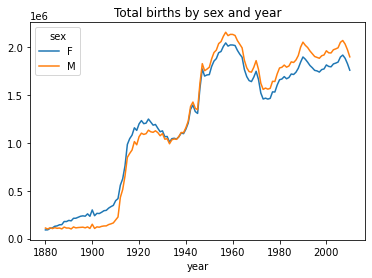

In [25]:
# 연도별 성별 총 합을 그래프로 나타내기
total_births.plot(title='Total births by sex and year')

In [27]:
# 각 이름이 전체 출생수에서 차지하는 비율 확인
# prop 값이 0.02라면 100명중 2명의 이름이 같다는 뜻
# 데이터를 연도와 성별로 그룹화 -> 각 그룹에 새 컬럼 추가

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [28]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003
